# Text cleaning and natural language processing (Python, regex, NLTK, Gensim) 

Author: Dennis W. Hallema 

Description: Tools for extracting topics and other insights from raw text data, and presenting those insights. 

Depends: See `environment.yml`. 

Disclaimer: Use at your own risk. No responsibility is assumed for a user's application of these materials or related materials. 

Data: 

* Exerpt from *Nature* (10/2019), "Quantum supremacy using a programmable superconducting processor." 
* Script of William Shakespeare's play *"Troilus and Cressida"* (c. 1602) 
* 12 Online Wikipedia articles on business performance 

<!-- 
Installation of polyglot:
1. git clone https://github.com/aboSamoor/polyglot.git
2. python setup.py install 
-->

Contents:  
* [Regular Expressions](#first-bullet)
* [Tokenization with NLTK](#second-bullet)
* [Non-ASCII tokenization (text with emojis)](#third-bullet)
* [Charting sentence length](#fourth-bullet)
* [Text cleaning and topic identification](#fifth-bullet)
* [Creating and querying a corpus with gensim](#sixth-bullet)

## Regular expressions <a class="anchor" id="first-bullet"></a>

Demonstration of text parsing and text based search with regex.

In [1]:
# Import regex module
import regex as re

# Create str variable (source: https://www.nature.com/articles/s41586-019-1666-5)
my_string = "A fundamental challenge is to build a high-fidelity processor capable of running quantum algorithms in an exponentially large computational space. Here we report the use of a processor with programmable superconducting qubits to create quantum states on 53 qubits, corresponding to a computational state-space of dimension 2 to the power 53 (about 10 to the power 16)."
print(my_string)

A fundamental challenge is to build a high-fidelity processor capable of running quantum algorithms in an exponentially large computational space. Here we report the use of a processor with programmable superconducting qubits to create quantum states on 53 qubits, corresponding to a computational state-space of dimension 2 to the power 53 (about 10 to the power 16).


In [2]:
# Split on sentence endings
sentence_endings = r"[.?!]"
print(re.split(sentence_endings, my_string))

['A fundamental challenge is to build a high-fidelity processor capable of running quantum algorithms in an exponentially large computational space', ' Here we report the use of a processor with programmable superconducting qubits to create quantum states on 53 qubits, corresponding to a computational state-space of dimension 2 to the power 53 (about 10 to the power 16)', '']


In [3]:
# Find all capitalized words in my_string
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Find all digits in my_string
digits = r"\d+"
print(re.findall(digits, my_string))

['Here']
['53', '2', '53', '10', '16']


In [4]:
# Find how many "qubits" are reported in my_string (lookahead after match)
qubits= r"\d+(?= qubits)"
print("Number of 'qubits' reported: " + str(re.findall(qubits, my_string)))

Number of 'qubits' reported: ['53']


<i>Regular Expressions:</i> In this text sample, Google describes a processor with 53 programmable superconducting quantum bits (or qubits). We could use the same 'lookahead after match' regex query if we wanted to generate an inventory of the number of qubits mentioned in other reports. We will not do that here, instead we'll explore the next topic.

## Tokenization with NLTK <a class="anchor" id="second-bullet"></a>

In [5]:
# Import modules
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Download NLTK packages
x = nltk.download('punkt', quiet = True)
x = nltk.download('wordnet', quiet = True)

In [6]:
# Import scene II of William Shakespeare's play "Troilus and Cressida"
filename = "data/troilus_scene2.txt"
with open(filename, 'r') as file:
    scene_two = file.read()
    
# Print the beginning of the text
print(scene_two[:200])

SCENE II. Troy. A street.
Enter Cressida and her man Alexander.

CRESSIDA.
Who were those went by?

ALEXANDER.
Queen Hecuba and Helen.

CRESSIDA.
And whither go they?

ALEXANDER.
Up to the eastern tow


In [7]:
# Split scene_two into sentences
sentences = sent_tokenize(scene_two)

# Tokenize (break up into words) the sixth sentence
sent_tokens = word_tokenize(sentences[5])
print(sent_tokens)

# Count the number of tokens
print("Number of unique tokens: " + str(len(sent_tokens)))

['Who', 'were', 'those', 'went', 'by', '?']
Number of unique tokens: 6


In [8]:
# Tokenize the entire scene
scene_tokens = set(word_tokenize(scene_two))

# Print the tokens
print(list(scene_tokens)[:100])

# Count the number of tokens
print("Number of tokens: " + str(len(scene_tokens)))

['Here', 'wit', 'maxim', 'bak', 'thousand', 'though', 'about', 'cares', '-Good', 'think', 'Paris', 'mercy', 'Men', 'an', 'know', 'dolts', 'choose', 'like', 'Look', 'Upon', 'Phrygia', 'fire', 'It', 'wooing', 'whither', 'virtue', 'higher', 'forked', 'Troilus-', 'toward', 'been', 'Faith', 'men', 'sauced', 'i', 'who', "'Jupiter", "E'en", "'d", 'Greece', 'tapster', 'attaint', 'bear', 'cop', 'uncle', 'Things', 'patience', 'heart', 'Whose', 'Is', 'height', 'up', 'is', 'everything', 'did', 'much', 'lifter', 'Pardon', 'Swords', "'Two", 'boy', 'th', 'am', 'laugh', 'prize', "'and", 'prophet', 'pass', 'melancholy', "to't", 'humours', 'firm', 'say', 'thing', 'admirable', 'eyes', 'judgement', 'noise', 'meat', 'lie', 'II', 'stain', 'my', 'nature', 'may', 'field', 'had', 'chickens', 'crush', 'cloven', 'watch', 'prove', 'appear', 'soldiers', 'Deiphobus', 'crowded', 'whose', 'How', 'By', 'become']
Number of tokens: 737


In [9]:
# Search for the first occurrence of "Hector" in scene_two and print 
match = re.search("Hector", scene_two)

# Print the start and end indexes of match
print(match.start(), match.end())

270 276


## Non-ASCII tokenization (text with emojis) <a class="anchor" id="third-bullet"></a>

In [10]:
# Import modules
from nltk.tokenize import regexp_tokenize, TweetTokenizer

# Create str variable
french_text = "Tu viens me chercher STP 😀🙏"

# Tokenize all words in french_text
all_words = word_tokenize(french_text)
print(all_words)

['Tu', 'viens', 'me', 'chercher', 'STP', '😀🙏']


In [11]:
# Tokenize only capital words
capital_words = r"[A-Z|Ü]\w+"
print(regexp_tokenize(french_text, capital_words))

# Tokenize only emojis
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(french_text, emoji))

['Tu', 'STP']
['😀', '🙏']


<i>Non-ASCII tokenization:</i> The above example demonstrates that tokenization is not limited to ASCII text. UTF character encodings (including emojis) can also be tokenized. This is useful in sentiment analysis, for example.

## Charting sentence length <a class="anchor" id="fourth-bullet"></a>

In [12]:
# Import the whole script of William Shakespeare's "Troilus and Cressida"
filename = "data/troilus.txt"
with open(filename, 'r') as file:
    troilus = file.read()
    
# Print the beginning of the text
print(troilus[:400])

SCENE: Troy and the Greek camp before it





PROLOGUE
In Troy, there lies the scene. From isles of Greece
The princes orgulous, their high blood chaf'd,
Have to the port of Athens sent their ships
Fraught with the ministers and instruments
Of cruel war. Sixty and nine that wore
Their crownets regal from the Athenian bay
Put forth toward Phrygia; and their vow is made
To ransack Troy, within whose


In [13]:
# Split the script into lines
lines = troilus.split('\n')

# Print lines
print("Prompts still there: " + str(lines[160:167]))

Prompts still there: ['TROILUS.', 'Sweet Pandarus-', '', 'PANDARUS.', 'Pray you, speak no more to me: I will leave all as I found it, and there an end.', '', '[Exit Pandarus. An alarum.]']


In [14]:
# Remove prompts like 'TROILUS.', 'ACT 1' and '[Exit Pandarus.]' with regex
pattern = "^\[(.*?)\]$|^[A-Z]{2,}.*|^Enter.*$"
lines = [re.sub(pattern, '', l) for l in lines]

# Print lines again
print("Prompts replaced with empty str: " + str(lines[160:167]))

Prompts replaced with empty str: ['', 'Sweet Pandarus-', '', '', 'Pray you, speak no more to me: I will leave all as I found it, and there an end.', '', '']


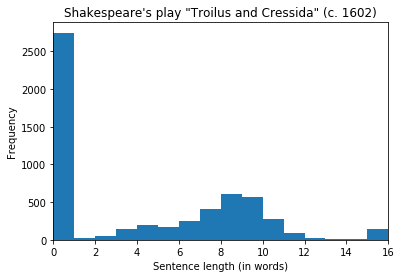

In [15]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Tokenize each line
tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]

# Make a frequency list of lengths
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of sentence lengths with collection bin for high values
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 200]
plt.xlim([0, bins[-2] + 1])
plt.hist(np.clip(line_num_words, bins[0], bins[-1]), bins=bins)
plt.gca().set(title = "Shakespeare\'s play \"Troilus and Cressida\" (c. 1602)", 
              xlabel = "Sentence length (in words)", ylabel = "Frequency")
plt.show()

<i>Charting sentence length with NLTK:</i> The histogram shows that most lines are non-dialogue lines (speaker prompts, stage instructions or vertical space). Dialogue lines are typically 9 words long. There are also lines of 15 words and longer, meaning that we should insert line breaks to make it easier to read the script on stage.

## Text cleaning and topic identification <a class="anchor" id="fifth-bullet"></a>

In [16]:
# Import William Shakespeare's play "Troilus and Cressida"
filename = "data/troilus.txt"
with open(filename, 'r') as file:
    troilus = file.read()

# Print the beginning of the text
print(troilus[:400])

SCENE: Troy and the Greek camp before it





PROLOGUE
In Troy, there lies the scene. From isles of Greece
The princes orgulous, their high blood chaf'd,
Have to the port of Athens sent their ships
Fraught with the ministers and instruments
Of cruel war. Sixty and nine that wore
Their crownets regal from the Athenian bay
Put forth toward Phrygia; and their vow is made
To ransack Troy, within whose


In [17]:
# Building a Counter with bag-of-words

# Import module
from collections import Counter

# Tokenize the text
tokens = word_tokenize(troilus)

# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[('.', 2881), (',', 2620), ('the', 816), ('and', 793), ('i', 604), (';', 584), ('to', 531), ('of', 507), ('a', 465), ('you', 441)]


The most common tokens (printed above) are punctuation and stop words but these are not useful in topic identification. We will therefore clean with regex and NLTK:
<ol>
    <li>Remove paragraphs we do not want to analyze</li>
    <li>Remove numbers and punctiation</li>
    <li>Remove stop words</li>
    <li>Lemmatize the remaining words</li>
</ol>
Lemmatization groups inflected forms of a word so they can be analyzed as a single item. This is similar to stemming except it also performs morphological analysis, and links words with similar meaning to one word.

In [18]:
# Text cleaning with regex

# Split the text into lines
lines = troilus.split("\n")

# Remove paragraphs we do not want to analyze (prompts 
# like 'TROILUS.', 'ACT 1' and '[Exit Pandarus.]')
pattern = "^\[(.*?)\]$|^[A-Z]{2,}.*|^Enter.*$"
lines = [re.sub(pattern, '', l) for l in lines]

# Recombine lines
troilus_body = '\n'.join(lines)
print(troilus_body[:300])








In Troy, there lies the scene. From isles of Greece
The princes orgulous, their high blood chaf'd,
Have to the port of Athens sent their ships
Fraught with the ministers and instruments
Of cruel war. Sixty and nine that wore
Their crownets regal from the Athenian bay
Put forth toward Phrygia;


<i>Text cleaning with regex:</i> The text (printed above) no longer contains prompts like 'TROILUS.', 'ACT 1' and '[Exit Pandarus.]'.

In [19]:
# Tokenize the text
tokens = word_tokenize(troilus_body)

# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in tokens]

# Remove numbers and punctation
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove stop words
english_stops = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now','d','ll','m','o','re','ve','y','ain','aren','couldn','didn','doesn','hadn','hasn','haven','isn','ma','mightn','mustn','needn','shan','shouldn','wasn','weren','won','']
earlymodern_stops = ['art','doth','dost','\'ere','hast','hath','hence','hither','nigh','oft','should\'st','thither','tither','thee','thou','thine','thy','\'tis','\'twas','wast','whence','wherefore','whereto','withal','would\'st','ye','yon','yonder']
no_stops = [t for t in alpha_only if t not in (english_stops + earlymodern_stops)]

# Instantiate the WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list (sort words by grouping inflected or variant forms of the same word)
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words
bow = Counter(lemmatized)

print("Most common tokens: " + str(bow.most_common(20)))

Most common tokens: [('shall', 126), ('hector', 121), ('come', 120), ('lord', 114), ('go', 85), ('troilus', 84), ('let', 79), ('love', 79), ('man', 77), ('good', 76), ('achilles', 74), ('would', 70), ('know', 63), ('like', 61), ('great', 61), ('say', 60), ('troy', 59), ('well', 59), ('tell', 58), ('one', 56)]


<i>Topic identification of Shakespeare's "Troilus and Cressida":</i> The signature of Elizabethan stage plays is evident from the frequent occurrence of words like 'shall' and 'lord' (see above). Hector, Troilus and Achilles are the most frequently talked about characters in that particular order (remember that we removed the character prompts). Also frequently mentioned are 'love' and 'troy'. After cleaning, tokenizing, and lemmatizing the text with regex and NLTK, we now have a good idea of the who, what and where of the play without having read it.

## Creating and querying a corpus with Gensim <a class="anchor" id="sixth-bullet"></a>

A text corpus is a set of texts that we can analyze and query. Here, we'll download a series of articles from the web, build a corpus and perform analysis on the corpus.

In [20]:
# Import modules
import requests
import bs4
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary

In [21]:
# Create list of web article urls
urls = ["https://en.wikipedia.org/wiki/Revenue",
        "https://en.wikipedia.org/wiki/Profit_margin",
        "https://en.wikipedia.org/wiki/Gross_margin",
        "https://en.wikipedia.org/wiki/Customer_acquisition_cost",
        "https://en.wikipedia.org/wiki/Customer_retention",
        "https://en.wikipedia.org/wiki/Loyalty_marketing",
        "https://en.wikipedia.org/wiki/Net_Promoter",
        "https://en.wikipedia.org/wiki/Lead_generation",
        "https://en.wikipedia.org/wiki/Conversion_rate_optimization",
        "https://en.wikipedia.org/wiki/Web_analytics",
        "https://en.wikipedia.org/wiki/Benchmarking",
        "https://en.wikipedia.org/wiki/Employee_engagement"
        ]

# Create list variable for GET query results
responses = []

# Get web articles
for url in urls:
    try:
        r = requests.get(url)
        r.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
    except Exception as err:
        print(f'Exception occurred: {err}')
    else:
        
        # Append query response
        responses.append(r)
        
print("Number of articles retrieved: " + str(len(responses)))

Number of articles retrieved: 12


If the GET query fails for an URL, the code above will skip the unresponsive URL and try next URL. The result is a list of length *n* containing the query results, where *n* equals the number of articles that were retrieved successfully.

In [22]:
# Create list variable for document tokens
articles = []
articles_text = []

# Extract text, clean text, tokenize and lemmatize for each article
for r in responses:
    
    # Extract text from HTML
    html = bs4.BeautifulSoup(r.text, 'html.parser')
    paragraphs = html.select("p")
    text = '\n'.join([ para.text for para in paragraphs])
    articles_text.append(text)
    
    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert the tokens into lowercase
    lower_tokens = [t.lower() for t in tokens]

    # Remove numbers and punctation
    alpha_only = [t for t in lower_tokens if t.isalpha()]

    # Remove stop words
    english_stops = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now','d','ll','m','o','re','ve','y','ain','aren','couldn','didn','doesn','hadn','hasn','haven','isn','ma','mightn','mustn','needn','shan','shouldn','wasn','weren','won','']
    no_stops = [t for t in alpha_only if t not in english_stops]

    # Lemmatize all tokens into a new list
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
    
    # Append lemmatized to list of document tokens
    articles.append(lemmatized)

# Print the beginning of each article
x = [print("Article " + str(i) + ": " + t[:70]) for i,t in enumerate(articles_text)]


Article 0: In accounting, revenue is the income that a business has from its norm
Article 1: Profit margin, net margin, net profit margin or net profit ratio is a 
Article 2: Gross margin is the difference between revenue and cost of goods sold 
Article 3: Customer Acquisition Cost (CAC) is the cost associated in convincing a
Article 4: Customer retention refers to the ability of a company or product to re
Article 5: Loyalty marketing is an approach to marketing, based on strategic mana
Article 6: 
Net Promoter or Net Promoter Score (NPS) is a management tool that ca
Article 7: 

In marketing, lead generation (/ˈliːd/) is the initiation of consume
Article 8: In internet marketing, and web analytics conversion optimization, or c
Article 9: Web analytics is the measurement, collection, analysis and reporting o
Article 10: Benchmarking is the practice of comparing business processes and perfo
Article 11: Employee engagement is a fundamental concept in the effort to understa


The 12 articles above are all related to business performance. For each of the articles we downloaded the HTML, extracted the text from HTML, cleaned the text, tokenized and lemmatized the tokens. Finally, we combined the result in a list variable. Next, we will create a corpus of these articles, and perform queries on the corpus.

In [23]:
# Create a Dictionary from the articles
dictionary = Dictionary(articles)

# Select the id for "cost"
cost_id = dictionary.token2id.get("cost")

# Use score_id with the dictionary to print the word
print(dictionary.get(cost_id))

cost


In [24]:
# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the third document
print(corpus[3][:10])

[(10, 2), (29, 6), (30, 1), (44, 3), (57, 15), (93, 1), (94, 1), (101, 1), (107, 1), (121, 1)]


In [25]:
# Gensim bag-of-words

# Import modules
from collections import defaultdict
import itertools

# Save the third document
doc = corpus[2]

# Sort the doc for frequency
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the most frequently occurring words in the third document
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

margin 63
gross 39
cost 35
profit 27
sale 22


In [26]:
# Create the defaultdict
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Print the most frequently occurring words in the corpus dictionary
w2cSorted = dict(sorted(total_word_count.items(), key=lambda x: x[1],reverse=True)[:10])
for word_id in w2cSorted:
    print(dictionary.get(word_id), w2cSorted[word_id])

customer 130
company 89
revenue 79
margin 73
lead 73
cost 68
marketing 63
web 59
business 58
sale 55


<i>Text corpus of business performance articles: </i> Word counts on the whole corpus (above) suggest that 'customer', 'company' and 'revenue' are the most important concepts discussed in these 12 articles.